# Does dorm matter for well-being?

A: Probably not.

We fit a range of models to predict student's t2 (fall) well-being (measured in week 4 of the semester). We define "well-being" as one of three variables: life satisfaction, stress, or loneliness.

1. Life satisfaction:
  * The only significant predictor of t2 life satisfaction is t1 life satisfaction. Adding demographics and network measures to the model does not improve fit.
  * Adding a dorm-level random intercept does not absorb any variance (aka the fit is the same).
1. Stress
  * While the most significant predictor of t2 stress is t1 stress, the model does improve somewhat with the addition of demographics and network measures. Specifically BFI neuroticism has a positive relationship with t2 stress, and this model has a better fit.
  * Again, adding a dorm-level random intercept does not absorb any variance
1. Loneliness
  * While the most significant predictor of t2 loneliness is t1 loneliness, the model does improve somewhat with the addition of demographics and network measures. Specifically BFI neuroticism has a positive relationship with t2 loneliness, and BFI extraversion has a negative relationship.
  * Again, adding a dorm-level random intercept does not absorb any variance


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configuration" data-toc-modified-id="Configuration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuration</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Load-data-and-remove-columns-we-don't-need" data-toc-modified-id="Load-data-and-remove-columns-we-don't-need-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data and remove columns we don't need</a></span></li><li><span><a href="#Cleaning---drop-rows-we-don't-want" data-toc-modified-id="Cleaning---drop-rows-we-don't-want-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning - drop rows we don't want</a></span><ul class="toc-item"><li><span><a href="#Drop-people-who-made-no-network-nominations" data-toc-modified-id="Drop-people-who-made-no-network-nominations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Drop people who made no network nominations</a></span></li><li><span><a href="#Drop-people-with-fewer-than-3-network-connections-(in-or-out)-as-we-don't-trust-the-averages-of-their-network's-traits" data-toc-modified-id="Drop-people-with-fewer-than-3-network-connections-(in-or-out)-as-we-don't-trust-the-averages-of-their-network's-traits-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Drop people with fewer than 3 network connections (in or out) as we don't trust the averages of their network's traits</a></span></li><li><span><a href="#Impute-missing-values-with-mice" data-toc-modified-id="Impute-missing-values-with-mice-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Impute missing values with <code>mice</code></a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Base-models---predict-well-being-at-t2-from-well-being-at-t1" data-toc-modified-id="Base-models---predict-well-being-at-t2-from-well-being-at-t1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Base models - predict well-being at t2 from well-being at t1</a></span></li><li><span><a href="#Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1" data-toc-modified-id="Fixed-effects-models:-predict-WB-at-t2-from-WB-and-other-personal-factors-at-t1-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fixed-effects models: predict WB at t2 from WB and other personal factors at t1</a></span></li><li><span><a href="#Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)" data-toc-modified-id="Examine-residuals-by-dorm.-If-there-is-a-sigificant-dorm-wide-effect,-we-should-see-some-clear-boxes-that-are-above-and-below-zero.-(Spoiler-alert:-we-don't)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)</a></span></li></ul></li><li><span><a href="#Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership-(Result:-no)" data-toc-modified-id="Add-random-effect-for-dorm,-see-if-significant-variance-is-attributable-to-dorm-membership-(Result:-no)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Add random effect for dorm, see if significant variance is attributable to dorm membership (Result: no)</a></span><ul class="toc-item"><li><span><a href="#OLD-CODE-DOES-NOT-RUN---Try-again,-with-some-dorm-level-covariates" data-toc-modified-id="OLD-CODE-DOES-NOT-RUN---Try-again,-with-some-dorm-level-covariates-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>OLD CODE DOES NOT RUN - Try again, with some dorm-level covariates</a></span></li></ul></li></ul></div>

## Configuration

In [1]:
# DV = 'life_satisfaction'
# DV = 'stress'
DV = 'loneliness'

DV_t1 = paste(DV, 't1', sep='_')
DV_t2 = paste(DV, 't2', sep='_')
c(DV, DV_t1, DV_t2)

[1] "loneliness"    "loneliness_t1" "loneliness_t2"

In [2]:
# all_wb_params = "life_satisfaction_t1 + loneliness_t1 + stress_t1"

demo_params = "
C(gender) + C(race) + empathy +
BFI_E + BFI_O + BFI_C + BFI_A + BFI_N +
intl_student + parent_education_highest + log10(family_income)"

network_params = "
degree_in_CloseFrds + degree_out_CloseFrds + empathy_CloseFrds +
degree_in_NegEmoSupp + degree_out_NegEmoSupp + empathy_NegEmoSupp"

all_fixed_params = paste(demo_params, '+', network_params)

## Libraries

In [3]:
library(car)
library(tidyverse)
library(mice)
library(nlme)
library(lme4)
library(lmerTest)

# Display more data in the Jupyter notebook
options(repr.matrix.max.cols=500, repr.matrix.max.rows=100)

Loading required package: carData

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()

Loading required package: lattice

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: ‘mice’


The following object is masked from ‘package:tidyr’:

    complete


The following objects are masked from ‘package:base’:

    cbind, rbind



Attaching package: ‘nlme’


The following object is mask

## Load data and remove columns we don't need

In [4]:
df = read.csv('data/MASTER/postprocessed/df_Rcleaned_train.csv', na.strings=c(""," ", "NA"))
dim(df)
head(df)

[1] 560  61

,X,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,wellbeing_composite_t1,wellbeing_composite_t2,degree_in_UNION,degree_out_UNION,empathy_UNION,degree_in_INTIMATE,degree_out_INTIMATE,empathy_INTIMATE,degree_in_ACQUAINTANCE,degree_out_ACQUAINTANCE,empathy_ACQUAINTANCE,degree_in_CloseFrds,degree_out_CloseFrds,empathy_CloseFrds,degree_in_NegEmoSupp,degree_out_NegEmoSupp,empathy_NegEmoSupp,degree_in_PosEmoSupp,degree_out_PosEmoSupp,empathy_PosEmoSupp,degree_in_Responsive,degree_out_Responsive,empathy_Responsive,degree_in_EmpSupp,degree_out_EmpSupp,empathy_EmpSupp,degree_in_PosAff,degree_out_PosAff,empathy_PosAff,degree_in_NegAff,degree_out_NegAff,empathy_NegAff,degree_in_Gossip,degree_out_Gossip,empathy_Gossip,degree_in_Liked,degree_out_Liked,empathy_Liked,degree_in_StudyWith,degree_out_StudyWith,empathy_StudyWith
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,5.5,3.5,6.5,0,70000,6.166667,2.000000,1.5,5,-0.05862651,0.83993983,3,0,NA,1,0,NA,1,0,NA,1,0,NA,0,0,NA,2,0,NA,0,0,NA,0,0,NA,1,0,NA,0,0,NA,1,0,NA,1,0,NA,1,0,NA
2,2,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,7.0,3.0,6.5,0,210000,5.166667,2.000000,3.0,5,-0.44690440,-0.66253028,6,4,6.437500,4,4,6.43750,0,1,6.125,4,4,6.43750,4,3,6.541667,3,4,6.4375,2,2,6.5625,1,2,6.5625,3,4,6.43750,1,1,6.5,4,3,6.541667,1,2,6.000,2,1,6.6250
3,3,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0,130000,5.500000,2.333333,3.0,6,0.61446613,-0.79801599,1,0,NA,1,0,NA,1,0,NA,1,0,NA,0,0,NA,1,0,NA,1,0,NA,0,0,NA,0,0,NA,0,1,5.0,0,0,NA,0,0,NA,0,0,NA
4,4,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,5.5,1.5,4.5,0,90000,5.833333,2.000000,2.5,6,0.22618824,-0.04126834,6,4,5.812500,3,1,5.62500,2,0,NA,2,1,5.62500,1,1,5.625000,1,1,6.6250,0,1,5.6250,0,1,4.8750,1,1,6.12500,0,0,NA,0,1,5.625000,0,1,6.000,3,1,6.6250
5,5,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,5.0,2.0,4.5,0,170000,6.666667,2.000000,2.0,4,0.48041399,0.64021289,6,9,5.847222,4,5,6.02500,2,2,5.875,3,4,5.81250,2,3,6.125000,2,2,5.3750,2,2,6.3125,1,4,6.1875,2,1,6.87500,1,0,NA,2,3,5.750000,1,1,5.125,4,2,6.1875
6,6,1110,female,white,Larkin,5.166667,6.750,2.000000,2.0,6.5,5.0,6.0,2.0,4.5,0,110000,6.833333,1.666667,2.0,5,-0.09159395,0.95635646,4,5,5.550000,4,4,5.40625,1,0,NA,3,4,5.40625,3,4,5.406250,3,2,6.0625,2,2,5.7500,3,1,6.0000,2,4,5.78125,0,0,NA,3,4,5.406250,4,1,6.000,3,4,5.4375


In [5]:
if (DV == 'life_satisfaction') {
    df = subset(df, select=-c(loneliness_t1, loneliness_t2, stress_t1, stress_t2))
} else if (DV == 'loneliness') {
    df = subset(df, select=-c(life_satisfaction_t1, life_satisfaction_t2, stress_t1, stress_t2))
} else if (DV == 'stress') {
    df = subset(df, select=-c(life_satisfaction_t1, life_satisfaction_t2, loneliness_t1, loneliness_t2))
} else {
    print("WTF")
}

In [6]:
head(df)

,X,PID,gender,race,dorm,empathy,loneliness_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O,intl_student,family_income,loneliness_t2,parent_education_highest,wellbeing_composite_t1,wellbeing_composite_t2,degree_in_UNION,degree_out_UNION,empathy_UNION,degree_in_INTIMATE,degree_out_INTIMATE,empathy_INTIMATE,degree_in_ACQUAINTANCE,degree_out_ACQUAINTANCE,empathy_ACQUAINTANCE,degree_in_CloseFrds,degree_out_CloseFrds,empathy_CloseFrds,degree_in_NegEmoSupp,degree_out_NegEmoSupp,empathy_NegEmoSupp,degree_in_PosEmoSupp,degree_out_PosEmoSupp,empathy_PosEmoSupp,degree_in_Responsive,degree_out_Responsive,empathy_Responsive,degree_in_EmpSupp,degree_out_EmpSupp,empathy_EmpSupp,degree_in_PosAff,degree_out_PosAff,empathy_PosAff,degree_in_NegAff,degree_out_NegAff,empathy_NegAff,degree_in_Gossip,degree_out_Gossip,empathy_Gossip,degree_in_Liked,degree_out_Liked,empathy_Liked,degree_in_StudyWith,degree_out_StudyWith,empathy_StudyWith
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,1,1001,male,south_asian,Rinconada,6.375,1.333333,6.5,6.0,5.5,3.5,6.5,0,70000,2.000000,5,-0.05862651,0.83993983,3,0,NA,1,0,NA,1,0,NA,1,0,NA,0,0,NA,2,0,NA,0,0,NA,0,0,NA,1,0,NA,0,0,NA,1,0,NA,1,0,NA,1,0,NA
2,2,1047,female,other_or_mixed,Twain,6.500,2.000000,5.5,6.5,7.0,3.0,6.5,0,210000,2.000000,5,-0.44690440,-0.66253028,6,4,6.437500,4,4,6.43750,0,1,6.125,4,4,6.43750,4,3,6.541667,3,4,6.4375,2,2,6.5625,1,2,6.5625,3,4,6.43750,1,1,6.5,4,3,6.541667,1,2,6.000,2,1,6.6250
3,3,1078,female,east_asian,Loro,6.250,1.333333,4.5,6.5,6.5,1.5,6.5,0,130000,2.333333,6,0.61446613,-0.79801599,1,0,NA,1,0,NA,1,0,NA,1,0,NA,0,0,NA,1,0,NA,1,0,NA,0,0,NA,0,0,NA,0,1,5.0,0,0,NA,0,0,NA,0,0,NA
4,4,1097,male,east_asian,Otero,5.000,2.000000,3.0,4.0,5.5,1.5,4.5,0,90000,2.000000,6,0.22618824,-0.04126834,6,4,5.812500,3,1,5.62500,2,0,NA,2,1,5.62500,1,1,5.625000,1,1,6.6250,0,1,5.6250,0,1,4.8750,1,1,6.12500,0,0,NA,0,1,5.625000,0,1,6.000,3,1,6.6250
5,5,1105,female,white,Larkin,5.750,2.000000,4.5,5.0,5.0,2.0,4.5,0,170000,2.000000,4,0.48041399,0.64021289,6,9,5.847222,4,5,6.02500,2,2,5.875,3,4,5.81250,2,3,6.125000,2,2,5.3750,2,2,6.3125,1,4,6.1875,2,1,6.87500,1,0,NA,2,3,5.750000,1,1,5.125,4,2,6.1875
6,6,1110,female,white,Larkin,6.750,2.000000,6.5,5.0,6.0,2.0,4.5,0,110000,1.666667,5,-0.09159395,0.95635646,4,5,5.550000,4,4,5.40625,1,0,NA,3,4,5.40625,3,4,5.406250,3,2,6.0625,2,2,5.7500,3,1,6.0000,2,4,5.78125,0,0,NA,3,4,5.406250,4,1,6.000,3,4,5.4375


In [7]:
# for (resp in c("life_satisfaction", "loneliness", "stress")) {
#     df[[paste0(resp, "_diff")]] <-
#         df[[paste0(resp, "_t2")]] - df[[paste0(resp, "_t1")]]
# }

In [8]:
# sat_summary_df <- 
#     df %>%
#     group_by(dorm) %>%
#     summarize(diff_mean=mean(life_satisfaction_diff),
#               diff_sd=sd(life_satisfaction_diff),
#               count=n()) %>%
#    mutate(se=diff_sd/ sqrt(count),
#           rel_se=diff_mean / se)

In [9]:
# sat_summary_df

## Cleaning - drop rows we don't want

### Drop people who made no network nominations

In [10]:
# print(dim(df))
# df = df[df$edges_out != 0,]
# print(dim(df))

### Drop people with fewer than 3 network connections (in or out) as we don't trust the averages of their network's traits

In [11]:
# table(df$edges_unique)

In [12]:
# print(dim(df))
# df = df[df$edges_unique >= 3,]
# print(dim(df))

### Impute missing values with `mice`

,X,PID,dorm,empathy,loneliness_t1,BFI_E,BFI_A,BFI_N,BFI_O,wellbeing_composite_t1,degree_in_UNION,degree_out_UNION,degree_in_INTIMATE,degree_out_INTIMATE,degree_in_ACQUAINTANCE,degree_out_ACQUAINTANCE,degree_in_CloseFrds,degree_out_CloseFrds,degree_in_NegEmoSupp,degree_out_NegEmoSupp,degree_in_PosEmoSupp,degree_out_PosEmoSupp,degree_in_Responsive,degree_out_Responsive,degree_in_EmpSupp,degree_out_EmpSupp,degree_in_PosAff,degree_out_PosAff,degree_in_NegAff,degree_out_NegAff,degree_in_Gossip,degree_out_Gossip,degree_in_Liked,degree_out_Liked,degree_in_StudyWith,degree_out_StudyWith,BFI_C,loneliness_t2,race,intl_student,wellbeing_composite_t2,gender,family_income,parent_education_highest,empathy_UNION,empathy_INTIMATE,empathy_CloseFrds,empathy_PosAff,empathy_PosEmoSupp,empathy_NegEmoSupp,empathy_Gossip,empathy_Responsive,empathy_StudyWith,empathy_Liked,empathy_EmpSupp,empathy_ACQUAINTANCE,empathy_NegAff,
18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
40,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
46,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,2
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,3
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,2
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,3
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,2


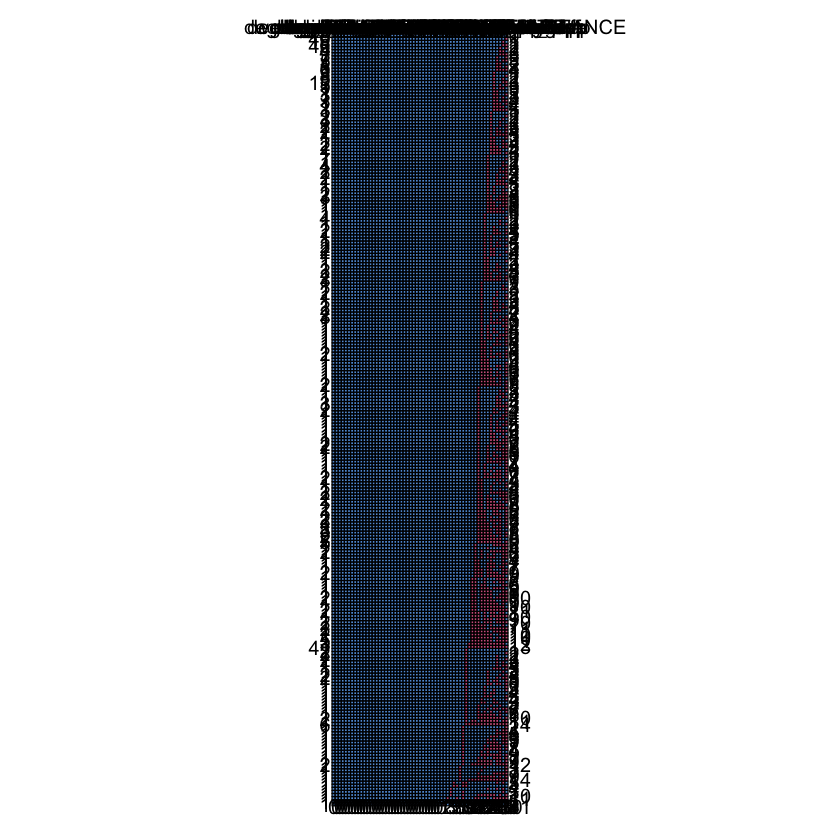

In [13]:
md.pattern(df)

In [14]:
imputed <- mice(df, m=1)
df = complete(imputed)
sum(is.na(df))


 iter imp variable
  1   1  gender  race  BFI_C*  intl_student*  family_income*  loneliness_t2*  parent_education_highest  wellbeing_composite_t2*  empathy_UNION  empathy_INTIMATE  empathy_ACQUAINTANCE  empathy_CloseFrds*  empathy_NegEmoSupp*  empathy_PosEmoSupp  empathy_Responsive  empathy_EmpSupp*  empathy_PosAff  empathy_NegAff*  empathy_Gossip  empathy_Liked  empathy_StudyWith*
  2   1  gender  race  BFI_C*  intl_student*  family_income  loneliness_t2*  parent_education_highest*  wellbeing_composite_t2  empathy_UNION  empathy_INTIMATE  empathy_ACQUAINTANCE*  empathy_CloseFrds  empathy_NegEmoSupp  empathy_PosEmoSupp*  empathy_Responsive*  empathy_EmpSupp*  empathy_PosAff*  empathy_NegAff  empathy_Gossip  empathy_Liked*  empathy_StudyWith
  3   1  gender  race  BFI_C*  intl_student*  family_income  loneliness_t2  parent_education_highest*  wellbeing_composite_t2*  empathy_UNION*  empathy_INTIMATE  empathy_ACQUAINTANCE  empathy_CloseFrds  empathy_NegEmoSupp  empathy_PosEmoSupp  empat

Warning message:
“Number of logged events: 156”


[1] 0

In [15]:
dim(df)
df = df[complete.cases(df), ]
dim(df)

[1] 560  57

[1] 560  57

## Model

In [16]:
head(df)

,X,PID,gender,race,dorm,empathy,loneliness_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O,intl_student,family_income,loneliness_t2,parent_education_highest,wellbeing_composite_t1,wellbeing_composite_t2,degree_in_UNION,degree_out_UNION,empathy_UNION,degree_in_INTIMATE,degree_out_INTIMATE,empathy_INTIMATE,degree_in_ACQUAINTANCE,degree_out_ACQUAINTANCE,empathy_ACQUAINTANCE,degree_in_CloseFrds,degree_out_CloseFrds,empathy_CloseFrds,degree_in_NegEmoSupp,degree_out_NegEmoSupp,empathy_NegEmoSupp,degree_in_PosEmoSupp,degree_out_PosEmoSupp,empathy_PosEmoSupp,degree_in_Responsive,degree_out_Responsive,empathy_Responsive,degree_in_EmpSupp,degree_out_EmpSupp,empathy_EmpSupp,degree_in_PosAff,degree_out_PosAff,empathy_PosAff,degree_in_NegAff,degree_out_NegAff,empathy_NegAff,degree_in_Gossip,degree_out_Gossip,empathy_Gossip,degree_in_Liked,degree_out_Liked,empathy_Liked,degree_in_StudyWith,degree_out_StudyWith,empathy_StudyWith
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,1,1001,male,south_asian,Rinconada,6.375,1.333333,6.5,6.0,5.5,3.5,6.5,0,70000,2.000000,5,-0.05862651,0.83993983,3,0,5.500000,1,0,6.750000,1,0,4.500,1,0,6.87500,0,0,4.000000,2,0,5.7500,0,0,4.6250,0,0,7.0000,1,0,6.87500,0,0,6.00,1,0,5.875000,1,0,5.8125,1,0,5.5000
2,2,1047,female,other_or_mixed,Twain,6.500,2.000000,5.5,6.5,7.0,3.0,6.5,0,210000,2.000000,5,-0.44690440,-0.66253028,6,4,6.437500,4,4,6.437500,0,1,6.125,4,4,6.43750,4,3,6.541667,3,4,6.4375,2,2,6.5625,1,2,6.5625,3,4,6.43750,1,1,6.50,4,3,6.541667,1,2,6.0000,2,1,6.6250
3,3,1078,female,east_asian,Loro,6.250,1.333333,4.5,6.5,6.5,1.5,6.5,0,130000,2.333333,6,0.61446613,-0.79801599,1,0,5.000000,1,0,6.333333,1,0,4.375,1,0,6.75000,0,0,4.750000,1,0,5.5000,1,0,4.0000,0,0,6.6250,0,0,6.87500,0,1,5.00,0,0,5.458333,0,0,5.8750,0,0,4.8750
4,4,1097,male,east_asian,Otero,5.000,2.000000,3.0,4.0,5.5,1.5,4.5,0,90000,2.000000,6,0.22618824,-0.04126834,6,4,5.812500,3,1,5.625000,2,0,4.500,2,1,5.62500,1,1,5.625000,1,1,6.6250,0,1,5.6250,0,1,4.8750,1,1,6.12500,0,0,4.75,0,1,5.625000,0,1,6.0000,3,1,6.6250
5,5,1105,female,white,Larkin,5.750,2.000000,4.5,5.0,5.0,2.0,4.5,0,170000,2.000000,4,0.48041399,0.64021289,6,9,5.847222,4,5,6.025000,2,2,5.875,3,4,5.81250,2,3,6.125000,2,2,5.3750,2,2,6.3125,1,4,6.1875,2,1,6.87500,1,0,3.75,2,3,5.750000,1,1,5.1250,4,2,6.1875
6,6,1110,female,white,Larkin,6.750,2.000000,6.5,5.0,6.0,2.0,4.5,0,110000,1.666667,5,-0.09159395,0.95635646,4,5,5.550000,4,4,5.406250,1,0,4.500,3,4,5.40625,3,4,5.406250,3,2,6.0625,2,2,5.7500,3,1,6.0000,2,4,5.78125,0,0,5.00,3,4,5.406250,4,1,6.0000,3,4,5.4375


### Base models - predict well-being at t2 from well-being at t1

In [17]:
equation = paste(DV_t2, '~', DV_t1)
print(equation)
base_model = lm(as.formula(equation), df)
summary(base_model)

[1] "loneliness_t2 ~ loneliness_t1"



Call:
lm(formula = as.formula(equation), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22700 -0.36808 -0.03475  0.34976  1.54202 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.88121    0.07850   11.23   <2e-16 ***
loneliness_t1  0.57677    0.04162   13.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5049 on 558 degrees of freedom
Multiple R-squared:  0.256,	Adjusted R-squared:  0.2547 
F-statistic:   192 on 1 and 558 DF,  p-value: < 2.2e-16


### Fixed-effects models: predict WB at t2 from WB and other personal factors at t1

In [18]:
equation = paste(DV_t2, '~', DV_t1, '+', all_fixed_params)
print(equation)
fixed_model = lm(as.formula(equation), df)
summary(fixed_model)

[1] "loneliness_t2 ~ loneliness_t1 + \nC(gender) + C(race) + empathy +\nBFI_E + BFI_O + BFI_C + BFI_A + BFI_N +\nintl_student + parent_education_highest + log10(family_income) + \ndegree_in_CloseFrds + degree_out_CloseFrds + empathy_CloseFrds +\ndegree_in_NegEmoSupp + degree_out_NegEmoSupp + empathy_NegEmoSupp"



Call:
lm(formula = as.formula(equation), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17558 -0.35254 -0.01282  0.32310  1.41823 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.152687   0.502019   2.296   0.0221 *  
loneliness_t1             0.490773   0.046719  10.505   <2e-16 ***
C(gender)male            -0.065561   0.046516  -1.409   0.1593    
C(gender)other            0.593874   0.253744   2.340   0.0196 *  
C(race)east_asian        -0.037835   0.082439  -0.459   0.6465    
C(race)hispanic           0.022099   0.090819   0.243   0.8078    
C(race)other_or_mixed    -0.051653   0.080599  -0.641   0.5219    
C(race)south_asian       -0.037344   0.095185  -0.392   0.6950    
C(race)white             -0.003232   0.079887  -0.040   0.9677    
empathy                   0.004019   0.036356   0.111   0.9120    
BFI_E                    -0.036201   0.015939  -2.271   0.0235 *  
BFI_O                   

In [19]:
anova(base_model, fixed_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,558,142.2578,NA,NA,NA,NA
2,536,130.8950,22,11.36284,2.114978,0.002330546


In [20]:
r1 = summary(base_model)$adj.r.squared
r2 = summary(fixed_model)$adj.r.squared
print(paste("Before:", r1))
print(paste("After:", r2))
print(paste("Partial r² (adjusted):", (r2 - r1) / (1 - r1)))

[1] "Before: 0.254664243661162"
[1] "After: 0.286049316580092"
[1] "Partial r² (adjusted): 0.0421086371504531"


### Examine residuals by dorm. If there is a sigificant dorm-wide effect, we should see some clear boxes that are above and below zero. (Spoiler alert: we don't)

In [21]:
df$residuals = base_model$residuals

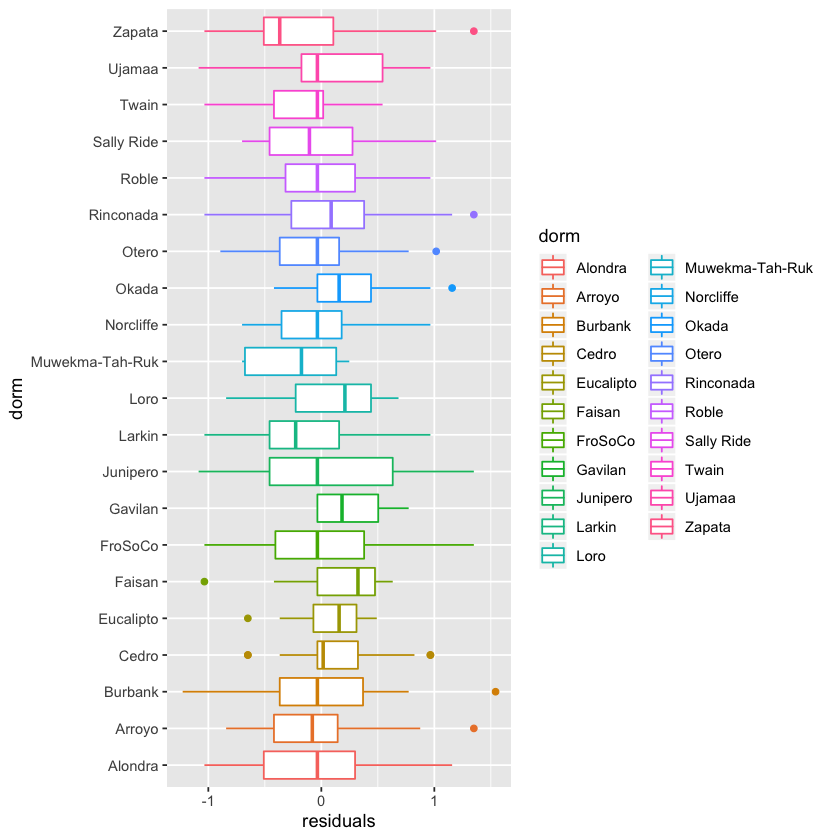

In [22]:
ggplot(data=df, mapping=aes(dorm, residuals)) + 
  geom_boxplot(aes(color=dorm)) + coord_flip()

## Add random effect for dorm, see if significant variance is attributable to dorm membership (Result: no)

In [23]:
mixed_model = lmer(as.formula(paste(equation, "+ (1|dorm)")), df, REML=TRUE)
summary(mixed_model)

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 24 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: as.formula(paste(equation, "+ (1|dorm)"))
   Data: df

REML criterion at convergence: 893.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.37888 -0.71339 -0.02595  0.65383  2.86990 

Random effects:
 Groups   Name        Variance Std.Dev.
 dorm     (Intercept) 0.0000   0.0000  
 Residual             0.2442   0.4942  
Number of obs: 560, groups:  dorm, 21

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                1.152687   0.502019 536.000000   2.296   0.0221 *  
loneliness_t1              0.490773   0.046719 536.000000  10.505   <2e-16 ***
C(gender)male             -0.065561   0.046516 536.000000  -1.409   0.1593    
C(gender)other             0.593874   0.253744 536.000000   2.340   0.0196 *  
C(race)east_asian         -0.037835   0.082439 536.000000  -0.459   0.6465    
C(race)hispanic            0.022099 

In [24]:
anova(mixed_model, fixed_model)

refitting model(s) with ML (instead of REML)



,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed_model,25,825.228,933.4264,-387.614,775.228,NA,NA,NA
mixed_model,26,827.228,939.7544,-387.614,775.228,6.82121e-13,1,0.9999993


### OLD CODE DOES NOT RUN - Try again, with some dorm-level covariates

In [29]:
fixed_equation

[1] "life_satisfaction_t2 ~ life_satisfaction_t1 + loneliness_t1 + stress_t1  + edges_in + edges_out"

In [30]:
mixed_model_with_l2_covariates = lmer(as.formula(paste(fixed_equation,
    "+ (1 + dorm_life_satisfaction_t1 + dorm_stress_t1 + dorm_loneliness_t1 +",
    "dorm_empathy | dorm)")),
    df)
summary(mixed_model_with_l2_covariates)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
as.formula(paste(fixed_equation, "+ (1 + dorm_life_satisfaction_t1 + dorm_stress_t1 + dorm_loneliness_t1 +",  
    "dorm_empathy | dorm)"))
   Data: df

REML criterion at convergence: 1085.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7514 -0.5581  0.0365  0.6176  3.9807 

Random effects:
 Groups   Name                      Variance Std.Dev. Corr                   
 dorm     (Intercept)               1.017745 1.00883                         
          dorm_life_satisfaction_t1 0.010624 0.10307  -0.82                  
          dorm_stress_t1            0.050027 0.22367  -0.89  0.94            
          dorm_loneliness_t1        0.157454 0.39680  -0.38 -0.10 -0.05      
          dorm_empathy              0.004344 0.06591   0.26 -0.11 -0.02 -0.76
 Residual                           0.629154 0.79319                         
Number of obs: 446, groups:  dorm, 21

Fixed eff

In [31]:
anova(mixed_model_with_l2_covariates, fixed_model_inout, refit=TRUE)

refitting model(s) with ML (instead of REML)

Warning message in optwrap(optimizer, devfun, x@theta, lower = x@lower, calc.derivs = TRUE, :
“convergence code 1 from bobyqa: bobyqa -- maximum number of function evaluations exceeded”


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed_model_inout,7,1069.087,1097.789,-527.5434,1055.087,NA,NA,NA
mixed_model_with_l2_covariates,22,1098.914,1189.121,-527.4572,1054.914,0.1723502,15,1


In [32]:
anova(mixed_model, mixed_model_with_l2_covariates, refit=FALSE)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_model,8,1101.733,1134.535,-542.8663,1085.733,NA,NA,NA
mixed_model_with_l2_covariates,22,1129.617,1219.824,-542.8085,1085.617,0.1156104,14,1


In [33]:
anova(mixed_model, mixed_model_with_l2_covariates, refit=TRUE)

refitting model(s) with ML (instead of REML)

Warning message in optwrap(optimizer, devfun, x@theta, lower = x@lower, calc.derivs = TRUE, :
“convergence code 1 from bobyqa: bobyqa -- maximum number of function evaluations exceeded”


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_model,8,1071.087,1103.889,-527.5434,1055.087,NA,NA,NA
mixed_model_with_l2_covariates,22,1098.914,1189.121,-527.4572,1054.914,0.1723502,14,1
